<a href="https://colab.research.google.com/github/nipa010/Machine-Learning/blob/main/Mall_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


import seaborn as sns
plt.style.use('ggplot')


In [ ]:
customer_data = pd.read_csv('/content/Wholesale-customers-data.csv')

In [ ]:
customer_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Age,Anual Income,Spending Score,Gender
0,2,3,12669,9656,7561,214,2674,1338,NaN,NaN,NaN,NaN
1,2,3,7057,9810,9568,1762,3293,1776,NaN,NaN,NaN,NaN
2,2,3,6353,8808,7684,2405,3516,7844,NaN,NaN,NaN,NaN
3,1,3,13265,1196,4221,6404,507,1788,NaN,NaN,NaN,NaN
4,2,3,22615,5410,7198,3915,1777,5185,NaN,NaN,NaN,NaN


In [ ]:
customer_data.shape

(440, 12)

In [ ]:
customer_data.isnull().sum()


Channel               0
Region                0
Fresh                 0
Milk                  0
Grocery               0
Frozen                0
Detergents_Paper      0
Delicassen            0
Age                 440
Anual Income        440
Spending Score      440
Gender              440
dtype: int64

In [ ]:
X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 9656  7561]
 [ 9810  9568]
 [ 8808  7684]
 [ 1196  4221]
 [ 5410  7198]
 [ 8259  5126]
 [ 3199  6975]
 [ 4956  9426]
 [ 3648  6192]
 [11093 18881]
 [ 5403 12974]
 [ 1124  4523]
 [12319 11757]
 [ 6208 14982]
 [ 9465 12091]
 [ 1114  3821]
 [ 8816 12121]
 [ 6157  2933]
 [ 6327 10099]
 [ 2495  9464]
 [ 4519  4602]
 [  871  2010]
 [ 1917  4469]
 [36423 22019]
 [ 9776 13792]
 [ 4230  7595]
 [  961  2861]
 [  803  3045]
 [20484 25957]
 [ 2100  2609]
 [ 3610 11107]
 [ 4339  3133]
 [ 1318  2886]
 [ 4786  7326]
 [ 1979  2262]
 [ 5491 11091]
 [ 4362  5428]
 [10556 12477]
 [15729 16709]
 [  555   902]
 [ 4332  4757]
 [ 3065  5956]
 [ 7555 14961]
 [11095 23998]
 [ 7027 10471]
 [22044 21531]
 [14069 21955]
 [54259 55571]
 [ 6152 10868]
 [21412 28921]
 [ 1095  1980]
 [ 4051  6996]
 [ 3916  5876]
 [10473 11532]
 [ 1449  1947]
 [ 3683  5005]
 [29892 26866]
 [ 9933 10487]
 [ 1970  1648]
 [ 5360  8040]
 [ 3045  7854]
 [38369 59598]
 [ 6245  6544]
 [11601 15775]
 [ 1227  3250]
 [20959 45828]
 [ 1534  7

In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

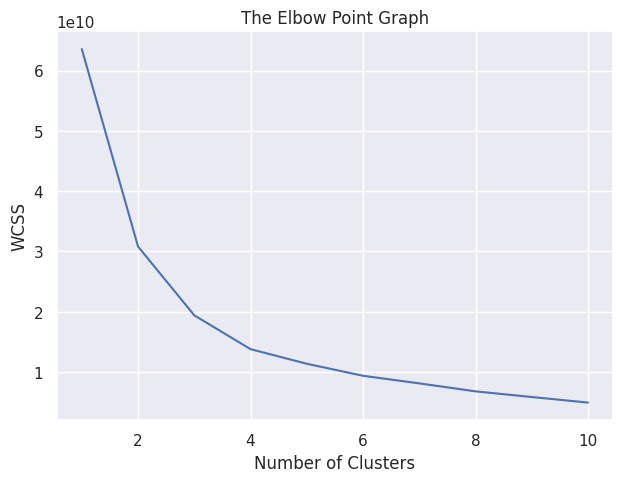

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters=4)
Y = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



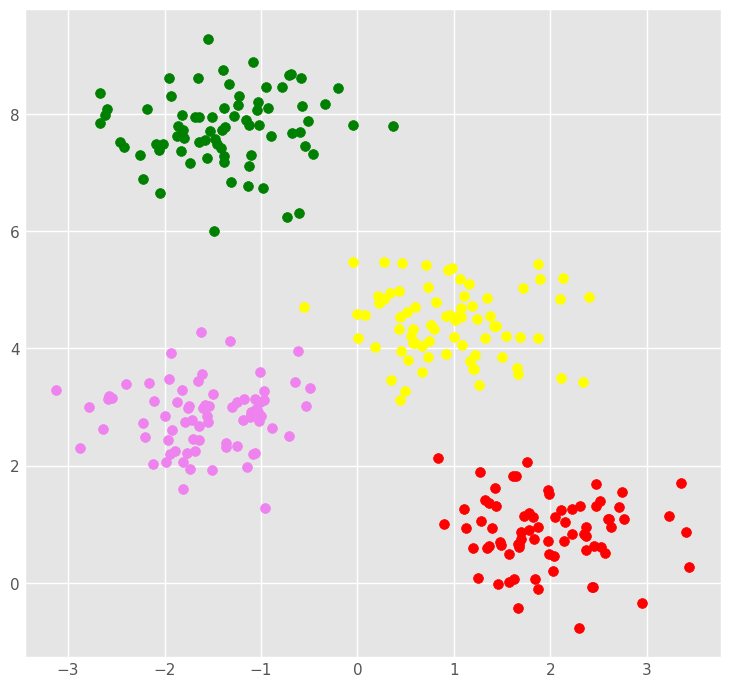

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='violet', label='Cluster 5')

In [ ]:
Y = kmeans.fit_predict(X)
print(Y)

[0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



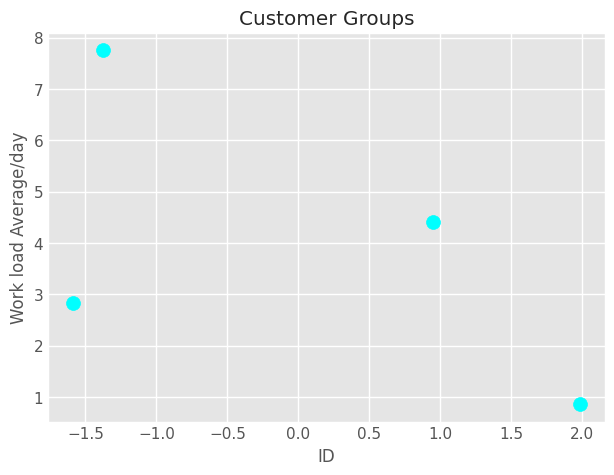

In [ ]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('ID')
plt.ylabel('Work load Average/day')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
score = silhouette_score(X, cluster_labels)
print("Silhouette Score: ", score)

Silhouette Score:  0.5923027677672242


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
kmeans_pca = KMeans(n_clusters=5, random_state=0)
cluster_labels_pca = kmeans_pca.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
score_with_pca = silhouette_score(X_pca, cluster_labels_pca)
print("Silhouette Score with PCA: ", score_with_pca)

Silhouette Score with PCA:  0.5923027677672242
